In [1]:
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
pd.options.display.max_colwidth = 100

In [3]:
df = pd.read_csv('compounds.csv',header = None)

In [4]:
view_stats = df.iloc[0,:]

In [5]:
print("so we have " + str(view_stats[0]) +" view counts, "+str(view_stats[1])+" likes, "+str(view_stats[2])+" dislikes. ")

so we have 13398 view counts, 885.0 likes, 12 dislikes. 


We can also try to see how it looks like by creating a pie-chart

In [6]:
import plotly.plotly as py
import plotly.graph_objs as go

labels = ['Likecout','Dislikecount']
values = [view_stats[1],view_stats[2]]

trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~spotify_junkie/0 or inside your plot.ly account where it is named 'basic_pie_chart'


So the cahrt above can present **visualisation** of how likeable our video is.

In [7]:
df = df.drop(index = 0)


In [8]:
df = df.rename(columns = {0:'text',1:'score',2:'likecount'})

In [9]:
df = df.reset_index(drop = True)

In [10]:
def Clean_Text(text):
    """
    text: input for the text
    Disclaimer:
    This is a ongoing cleaning function
    """

    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"he's","he is ",text)
    text = re.sub(r"she's","she is ",text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(r'[^\w\s]','',text)
    text = text.strip(' ')
    return text


In [11]:
df['clean_text'] = df['text'].map(lambda com:Clean_Text(com))

In [12]:
df.head(10)


,text,score,likecount,clean_text
0,Your voice just give me chills. Keep up the good content. Kiss from Portugal,0.6908,0,your voice just give me chills keep up the good content kiss from portugal
1,in the next video you have to play the acoustic guitar in the back corner!,0.4003,1,in the next video you have to play the acoustic guitar in the back corner
2,it was berrylemon mayuko😂,0.0000,0,it was berrylemon mayuko
3,Mayuko can get book please I like your channel please,0.7269,0,mayuko can get book please i like your channel please
4,"""Read documentation for fun, like do people even do that?"" Really, DO PEOPLE EVEN DO THAT?",0.7319,1,read documentation for fun like do people even do that really do people even do that
5,"Hi Mayuko, Thanks for the tips. i got a job a software engineering jobs because of your suggesti...",0.8689,0,hi mayuko thanks for the tips i got a job a software engineering jobs because of your suggestion...
6,Really appreciate your videos:) Every time I watch your video it gives me inspiration to be what...,0.9450,1,really appreciate your videos every time i watch your video it gives me inspiration to be what i...
7,"I can't take it anymore, I don't even have OCD but that intro with the generic typing noise and ...",0.7684,0,i can not take it anymore i do not even have ocd but that intro with the generic typing noise an...
8,Hi Mayuko! Thank you so much for the plug and share! Congratulations again on your marriage =) =),0.9391,3,hi mayuko thank you so much for the plug and share congratulations again on your marriage
9,Could you get a job in software engineering if you practiced yourself and didnt go to school for...,0.0000,0,could you get a job in software engineering if you practiced yourself and didnt go to school for...


So now since we have `cleaned text`, we are going to try use NLTK again to see the new score.

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sid
sid = sid()
df['clean_text_score'] = df['clean_text'].map(lambda com:sid.polarity_scores(com)['compound'])

In [14]:
df.head(3)

,text,score,likecount,clean_text,clean_text_score
0,Your voice just give me chills. Keep up the good content. Kiss from Portugal,0.6908,0,your voice just give me chills keep up the good content kiss from portugal,0.6908
1,in the next video you have to play the acoustic guitar in the back corner!,0.4003,1,in the next video you have to play the acoustic guitar in the back corner,0.3400
2,it was berrylemon mayuko😂,0.0000,0,it was berrylemon mayuko,0.0000


What comments is the most likeable one ? And what's the score it get from the `polarity_scores` function ? 

In [15]:
df_like_ranking = df.sort_values('likecount',ascending = False)

In [16]:
df_like_ranking.head(10)

,text,score,likecount,clean_text,clean_text_score
67,CONGRATS ON NEWLYWED LIFE!!!! wishing nothing but the best for you and the hubby 💞,-0.5724,26,congrats on newlywed life wishing nothing but the best for you and the hubby,-0.4408
44,I don't know if it's possible for me to believe that she had a bad GPA in college,-0.5423,8,i do not know if it possible for me to believe that she had a bad gpa in college,-0.5423
73,"Thanks for answering my question, you're amazing! :D",0.9006,6,thanks for answering my question you are amazing d,0.7717
77,From first comments!! We miss you so much mayuko!!🤗\nWELCOME BACK!! 😉😉😉,0.6772,5,from first comments we miss you so much mayuko welcome back,0.3947
65,The Design of Everyday Things!! I've been reading that book. It's a good one! 😁,0.5826,4,the design of everyday things i have been reading that book it a good one,0.4404
8,Hi Mayuko! Thank you so much for the plug and share! Congratulations again on your marriage =) =),0.9391,3,hi mayuko thank you so much for the plug and share congratulations again on your marriage,0.8225
54,"Tengo 20 años y actualmente estoy estudiando ingeniería en sistemas computacionales, tengo una p...",0.0000,3,tengo 20 años y actualmente estoy estudiando ingeniería en sistemas computacionales tengo una pr...,0.0000
83,I miss you so much mayuko 😙,-0.1531,2,i miss you so much mayuko,-0.1531
22,ayyy my man dave xiang,0.0000,2,ayyy my man dave xiang,0.0000
1,in the next video you have to play the acoustic guitar in the back corner!,0.4003,1,in the next video you have to play the acoustic guitar in the back corner,0.3400


If you wanna know **all** the likecount in a decending order ,just remove the `#` in the next chuck and it will show you the result.

In [17]:
#df_like_ranking

Of course the `polaity_scores` function itself can have some issues on giving score to the online comments ,some of them contains
**sarcasm and slang** , those together all cause the fucntion to pick up and give scores. So for this, it's really important to see the **intersection of the most likeable and the highest score**.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 5 columns):
text                84 non-null object
score               84 non-null float64
likecount           84 non-null int64
clean_text          84 non-null object
clean_text_score    84 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 3.4+ KB


In [19]:
def pick_up_comments(data,score,threshold):
    """
    This function take three inputs:
    - data :dataframe
    - score : score you wannt to examine,input requires to be in [-1,1]. For negative numbers it will run scores no greater than the input,for positve
        numbers it will find scores no smaller than the input.
    - likecount : postive interger input required.
    
    """
    
    if score > 0:
        df =  data.loc[(df_like_ranking["clean_text_score"] >= score) & (df_like_ranking["likecount"] >= threshold)].sort_values(['likecount', 'score'],ascending=[False, False])
        return df
    elif score <= 0:
        df =  data.loc[(df_like_ranking["clean_text_score"] <= score) & (df_like_ranking["likecount"] >= threshold)].sort_values(['likecount', 'score'],ascending=[False, True])
        return df
              

----

Here is just a part we are going to use the function to see how the `clean_text_score` interact with likecount.
You can change the number for your own analysis.

In [20]:
pick_up_comments(df_like_ranking,0.8,50)

,text,score,likecount,clean_text,clean_text_score


In [21]:
pick_up_comments(df_like_ranking,-0.5,50)

,text,score,likecount,clean_text,clean_text_score


In [22]:
pick_up_comments(df_like_ranking,-0.4,50)

,text,score,likecount,clean_text,clean_text_score


In [23]:
pick_up_comments(df_like_ranking,-0.6,20)

,text,score,likecount,clean_text,clean_text_score


We can play with the function if we want to see how the comments distribute. 

For this special case, specific analysis and detailed explanation would be useful for this single one video, so I will leave here .

-----

One thing I am interested in is the distribution of likecount of certain videos , let's check .

# Histogram of the score

In [24]:
from scipy.stats import kurtosis
doanes = lambda data: int(1 + np.log(len(data)) + np.log(1 +  kurtosis(data) * (len(data)/6.)** 0.5))

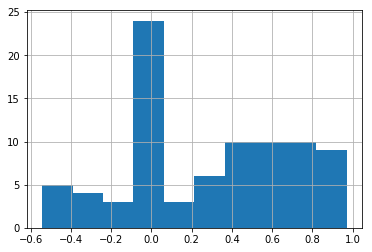

In [25]:
df_like_ranking.clean_text_score.hist()

# Histogram of the score

In [26]:
from scipy.stats import kurtosis
doanes = lambda data: int(1 + np.log(len(data)) + np.log(1 +  kurtosis(data) * (len(data)/6.)** 0.5))

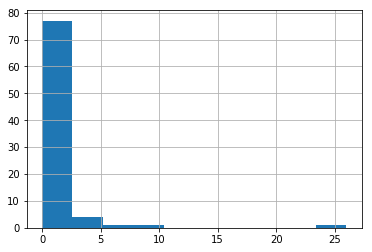

In [27]:
df_like_ranking.likecount.hist(bins = doanes(df_like_ranking["likecount"]))

maybe try to plot scatter points betweeen `likecounts` and `clean_text_score`.

/Users/yuhui/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



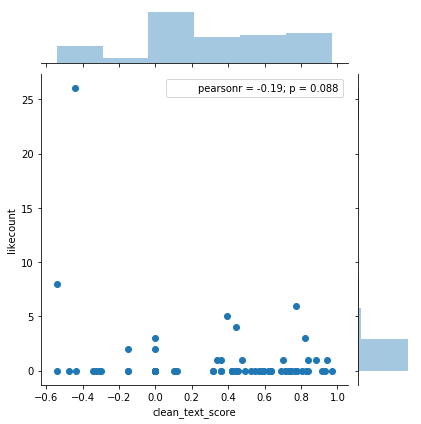

In [28]:
sns.jointplot(x="clean_text_score", y="likecount", data=df_like_ranking)